## Social Media Ads Analysis & Modeling

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### Load Data

In [2]:
# Import data
data = pd.read_csv("Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
# Explore Data set
data.shape

(400, 5)

In [4]:
# Data type for each column
dataset_info = pd.DataFrame()
dataset_info["Data Type"] = data.dtypes
dataset_info["No. of NAs"] = data.isna().sum()
dataset_info

,Data Type,No. of NAs
User ID,int64,0
Gender,object,0
Age,int64,0
EstimatedSalary,int64,0
Purchased,int64,0


In [5]:
# Descriptive Statistics
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


Mean age is 37 years. 

In [6]:
# Count for each gender
data["Gender"].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

In [7]:
# Count for number of customers who purchased
data["Purchased"].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [8]:
# Count for purchased by gender
data.pivot_table(
    index="Purchased",
    columns="Gender", 
    values="User ID",
    aggfunc="count",
    fill_value=0,
    margins=True
)

Gender,Female,Male,All
Purchased,,,
0,127,130,257
1,77,66,143
All,204,196,400


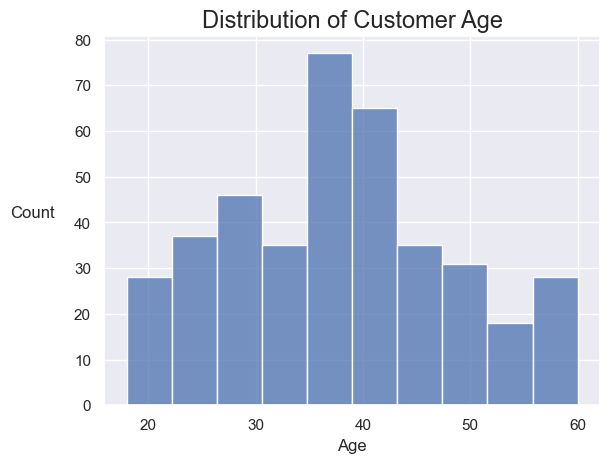

In [9]:
# Distribution of Customer Age
sns.histplot(data, x="Age", bins=10)
plt.title("Distribution of Customer Age", fontsize=17)
plt.ylabel("Count", rotation=0, labelpad=30)
plt.show()

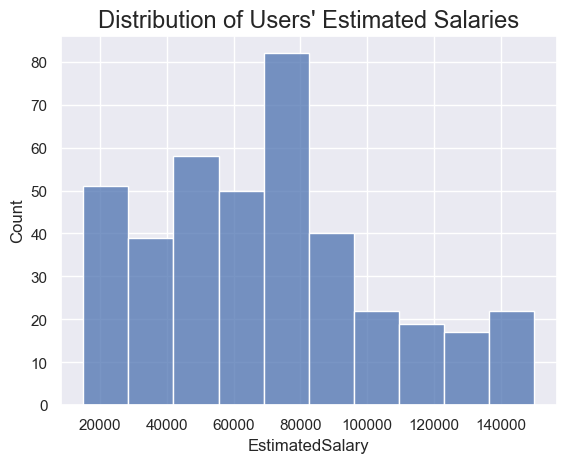

In [10]:
# Distribution of Estimated Salary
sns.histplot(data, x="EstimatedSalary", bins=10)
plt.title("Distribution of Users' Estimated Salaries", fontsize=17)
plt.show()

#### Transform Data

In [11]:
# Re-map "Gender" column
data["Gender"] = data["Gender"].map({"Male":1, "Female":0})
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [12]:
# Transformation of "EstimatedSalary" column
from scipy.stats import boxcox

data["Salary_Transformed"] = boxcox(data["EstimatedSalary"])[0]
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Salary_Transformed
0,15624510,1,19,19000,0,201.646342
1,15810944,1,35,20000,0,206.524609
2,15668575,0,26,43000,0,294.864899
3,15603246,0,27,57000,0,336.091372
4,15804002,1,19,76000,0,384.076979


In [13]:
# Scale "EstimatedSalary" and "Age" columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

columns_to_scale = data[["Age", "Salary_Transformed"]]
scaler.fit(columns_to_scale)
data[["Age_Scaled", "Salary_Transformed_Scaled"]] = scaler.fit_transform(columns_to_scale)
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Salary_Transformed,Age_Scaled,Salary_Transformed_Scaled
0,15624510,1,19,19000,0,201.646342,-1.781797,-1.809254
1,15810944,1,35,20000,0,206.524609,-0.253587,-1.752550
2,15668575,0,26,43000,0,294.864899,-1.113206,-0.725701
3,15603246,0,27,57000,0,336.091372,-1.017692,-0.246493
4,15804002,1,19,76000,0,384.076979,-1.781797,0.311281


#### Define model features and inputs

In [14]:
# Define features
X = data[["Gender", "Age_Scaled", "Salary_Transformed_Scaled"]]

In [15]:
# Define target
y = data["Purchased"]

#### Divide data into testing and training sets

In [16]:
# Divide data into training and testing.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=25)

In [17]:
# Convert train and test data sets into tensors
import tensorflow as tf
tf.random.set_seed(15)

#### Define model and parameters

In [18]:
# Define model and layers
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3,)), 
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [19]:
# Define model attributes
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["AUC"]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 161 (644.00 B)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

#### Train and evaluate model

In [20]:
# Train model
num_epochs = 15
history = model.fit(X_train, 
                    y_train, 
                    batch_size=5, 
                    epochs=num_epochs, 
                    verbose=1, 
                    validation_split=0.2
                   )
history

Epoch 1/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - AUC: 0.7476 - loss: 0.6835 - val_AUC: 0.8704 - val_loss: 0.6212
Epoch 2/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - AUC: 0.8968 - loss: 0.5970 - val_AUC: 0.8555 - val_loss: 0.5644
Epoch 3/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - AUC: 0.8972 - loss: 0.5293 - val_AUC: 0.8568 - val_loss: 0.5187
Epoch 4/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - AUC: 0.8980 - loss: 0.4744 - val_AUC: 0.8604 - val_loss: 0.4849
Epoch 5/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - AUC: 0.9002 - loss: 0.4315 - val_AUC: 0.8659 - val_loss: 0.4618
Epoch 6/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - AUC: 0.9038 - loss: 0.4000 - val_AUC: 0.8713 - val_loss: 0.4459
Epoch 7/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - AUC: 0.9079 - loss: 0.3766 - val_AUC: 0.8753 - val_loss: 0.4341
Epoch 8/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - AUC: 0.9109 - loss: 0.3579 - val_AUC: 0.8780 - val_loss: 0.4243
Epoch 9/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - AUC: 0.9150 - loss

In [21]:
# Evaluate model
results = model.evaluate(X_test, y_test, batch_size=5)
print("Model testing accuracy is", round(results[1], 3), "\nModel testing loss is", round(results[0], 3))

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - AUC: 0.9841 - loss: 0.2365 
Model testing accuracy is 0.956 
Model testing loss is 0.278


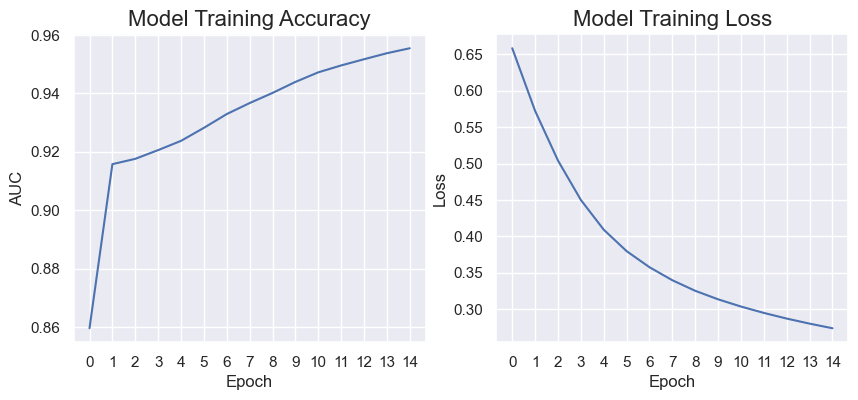

In [23]:
# Plot accuracy and loss
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.plot(history.history["AUC"])
ax1.set_xlabel("Epoch")
ax1.set_ylabel("AUC")
ax1.set_xticks(np.arange(0, num_epochs, 1))
ax1.set_title("Model Training Accuracy", fontsize=16)

ax2.plot(history.history["loss"])
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Loss")
ax2.set_xticks(np.arange(0, num_epochs, 1))
ax2.set_title("Model Training Loss", fontsize=16)
plt.show()

In [24]:
# Predictions from testing data
y_pred = model.predict(X_test)

# Set theshold
threshold = 0.7
y_pred_with_threshold = np.where(y_pred > threshold, 1, 0)

# Generate confusion matrix
tf.math.confusion_matrix(y_test, y_pred_with_threshold)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[37,  1],
       [ 8, 14]])>

In [25]:
# Predictions from testing data
y_pred = model.predict(X_test)

# Set theshold
threshold = 0.7
y_pred_with_threshold = np.where(y_pred > threshold, 1, 0)

# Generate confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_test, y_pred_with_threshold)
confusion_matrix

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[37,  1],
       [ 8, 14]])>

In [26]:
# Take Values from Confusion Matrix
tp = confusion_matrix[0,0].numpy()
fp = confusion_matrix[0,1].numpy()
fn = confusion_matrix[1,0].numpy()
tn = confusion_matrix[1,1].numpy()

In [27]:
# Precision
precision = round(tp / (tp + fp), 2)
print("Model precision =", precision)

# Recall
recall = round(tp / (tp + fn), 2)
print("Model recall =", recall)

# Accuracy
accuracy = round((tp + tn) / (tp + tn + fp + fn), 2)
print("Model accuracy =", accuracy)

# F1 Score
f1_score = round(2 *(precision * recall) / (precision + recall), 2)
print("Model F1 Score =", f1_score)

Model precision = 0.97
Model recall = 0.82
Model accuracy = 0.85
Model F1 Score = 0.89


#### Model coefficients

In [28]:
# Use statsmodels to get p-values
import statsmodels.api as sm
ols_model = sm.OLS(y_train, X_train)
results = ols_model.fit()

In [29]:
# Coefficients and p-values
details = pd.DataFrame()
details["Coefficients"] = results.params
details["p-values"] = results.pvalues#.round(10)
details

,Coefficients,p-values
Gender,0.375529,1.254870e-25
Age_Scaled,0.284891,9.100785e-28
Salary_Transformed_Scaled,0.122238,4.209761e-07


#### Generate predictions based on new data

In [30]:
# Function to make predictions from a set of input tensors
def predict_with_new_data(input):
    scaled_input = scaler.fit_transform(input)
    scaled_input_tensor = tf.convert_to_tensor(scaled_input, dtype=tf.float32)
    prediction = model.predict(tf.stack(scaled_input_tensor))
    return tf.round(prediction * 1000.0) / 1000.0

In [31]:
# Generate new, random data to test model
random_new_data = []

for i in np.arange(1,11):
    gender_random = np.random.choice([0, 1]) # Gender
    age_random = int(np.random.uniform(18, 65)) # Age
    salary_transformed_random = int(np.random.uniform(180, 400)) # Salary
    test_user_data = [gender_random, age_random, salary_transformed_random]
    random_new_data.append(test_user_data)

random_new_data

[[0, 61, 276],
 [1, 55, 269],
 [0, 41, 317],
 [1, 39, 217],
 [1, 52, 198],
 [1, 23, 222],
 [1, 38, 328],
 [0, 51, 396],
 [0, 20, 225],
 [1, 57, 372]]

In [32]:
# Run prediction on randomized new data
new_predictions = predict_with_new_data(random_new_data)
new_predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.694],
       [0.618],
       [0.362],
       [0.036],
       [0.358],
       [0.003],
       [0.197],
       [0.889],
       [0.01 ],
       [0.928]], dtype=float32)>

#### Clustering

In [33]:
# Import library
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# For newer versions of Python/Jupyter, change default so that method config attributes always show
from sklearn import set_config
set_config(print_changed_only=False, display='diagram')

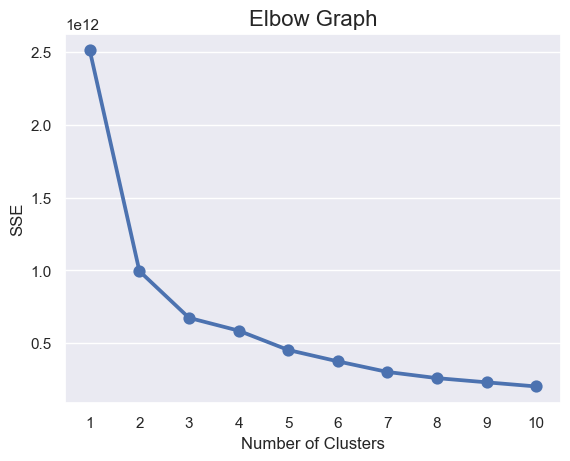

In [34]:
# Define cluster number with elbow method
sse = {}

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data)
    sse[k] = kmeans.inertia_

sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.title("Elbow Graph", fontsize=16)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [35]:
# Initiate model state
kmeans = KMeans(n_clusters=4, random_state=1)

# Model fitting
kmeans.fit(data)

KMeans(algorithm='lloyd', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init='auto', random_state=1, tol=0.0001, verbose=0)

In [36]:
# Cluster labels
data["Cluster"] = kmeans.labels_
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Salary_Transformed,Age_Scaled,Salary_Transformed_Scaled,Cluster
0,15624510,1,19,19000,0,201.646342,-1.781797,-1.809254,1
1,15810944,1,35,20000,0,206.524609,-0.253587,-1.752550,0
2,15668575,0,26,43000,0,294.864899,-1.113206,-0.725701,2
3,15603246,0,27,57000,0,336.091372,-1.017692,-0.246493,1
4,15804002,1,19,76000,0,384.076979,-1.781797,0.311281,0


In [37]:
# Metrics on each cluster
data.groupby("Cluster").agg({
    "User ID" : "count",
    "Gender" : "mean",
    "Purchased" : "mean", 
    "Age" : "mean",
    "EstimatedSalary" : "mean"
}).round(2).rename(columns={
    "User ID" : "Cluster Size",
    "Gender" : "Percent M/F",
    "Purchased" : "Percent Purchased"
})

,Cluster Size,Percent M/F,Percent Purchased,Age,EstimatedSalary
Cluster,,,,,
0,121,0.45,0.35,37.13,73231.40
1,77,0.44,0.31,37.68,42142.86
2,139,0.55,0.37,37.81,72345.32
3,63,0.51,0.41,38.29,91031.75
